## Generate CNN Model Training Data
### Goals:
* Make RGB of each HSI
* Accumulate masks of RGB 

#### Key is to have 2 folders '\images' and '\masks'

In [6]:
# The dependencies
from spectral import *
import spectral.io.envi as envi
import numpy as np
from PIL import Image
import pandas as pd
from os import listdir
sys.path.append("../Utilities")
from HDRprocess import *
from HSI_Model import *
import glob
import winsound
import cv2

In [7]:
# Start 
# list_rootPaths = []

#
## Get all folders to search through
#
path_root = 'V:\\Data\\St_Supery\\IOP6_October2021\\tripod'
list_stdFolders = get_folder_list_from_root_dir(path_root)
# path_mask = get_mask_from_root_dir(list_stdFolders[1],'png')
list_exposures = ['15ms','25ms'] #add 5ms later
names = get_hsi_folder_names(path_root)


In [3]:
# hsi_test = HSI_Model(get_absolute_path_HDR_from_parent_path_and_exposure(list_stdFolders[1],'15ms'),names[1],path_mask)

True

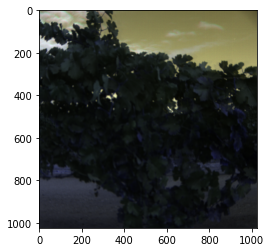

In [9]:
# imshow(hsi_test.rgb)
# cv2.imwrite('test.jpg',hsi_test.rgb/150)

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-32768.0, 32767.0]
    G: [-32768.0, 32767.0]
    B: [-32768.0, 32767.0]

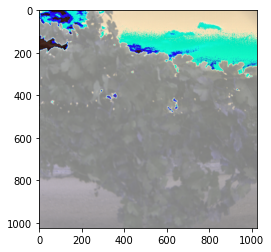

In [12]:
# imshow(hsi_test.rgb.astype(np.int16))

In [ ]:
# imshow(hsi_test.mask)

In [ ]:
# imshow(hsi.rgb)
# print(hsi.imageName )
# print(hsi.wv)
# wv[6] for blue
# wv[14] for green
# wv[]

In [ ]:

# Meat and potatos:
for exposure in list_exposures:
    print(f"iterating exposure: {exposure}")
    for idxStdFolder ,stdFolder in enumerate(list_stdFolders):
        print(f"Current folder: {stdFolder}")
        path_hdr = get_absolute_path_HDR_from_parent_path_and_exposure(stdFolder,exposure)
        
        try: # try to get the optional mask parameter
            path_mask = get_mask_from_root_dir(stdFolder,'png')
        except:
            continue # this will skip until a mask is found
            #path_mask = None
        
        try:
            if path_mask != None:
                hsi = HSI_Model(path_hdr,f"{names[idxStdFolder]}_{exposure}",path_mask)
            else:
                print("Error grabbing path to mask")
            #     hsi = HSI_Model(path_hdr,f"{names[idxStdFolder]}_{exposure}")
        except Exception as e:
            print(e)
            print(f'skipping folder: {idxStdFolder, stdFolder}')
            continue


        # imshow(hsi.rgb)
        # imshow(hsi.rgb/256)
        # hsi.save_rgb('IOP6_RGB_Images')
        hsi.save_mask('IOP6_Mask_Labels')
        print(f"Saved RGB: {hsi.imageName}")


ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

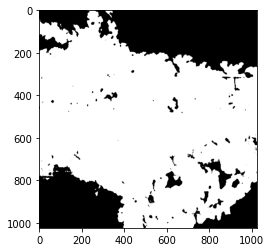

In [5]:
imshow(hsi_test.mask)

In [8]:
help(HSI_Model)

Help on module HSI_Model:

NAME
    HSI_Model

CLASSES
    builtins.object
        HSI_Model
    
    class HSI_Model(builtins.object)
     |  HSI_Model(path_hcube, imgName, path_mask=None) -> None
     |  
     |  A custom object designed to house: Hypercube, wavelengths used, RGB image, logical mask
     |  
     |  Methods defined here:
     |  
     |  __init__(self, path_hcube, imgName, path_mask=None) -> None
     |      Takes absolute path to HDR file, name of this HSI, optional path to associated multi-class mask
     |  
     |  load_mask(self, path_mask)
     |      Called on initialization, if a path to multi-class mask is provided to constructor
     |  
     |  save_rgb(self, path_save_dir)
     |      Used to save the composite rgb image of HSI
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __